## DATA CLEANING

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Pandas utility function

In [2]:
pd.isnull(np.nan)

True

In [3]:
pd.isnull(None)

True

In [4]:
pd.isna(np.nan)

True

In [5]:
pd.isna(None)

True

In [6]:
pd.notnull(None)

False

In [7]:
pd.notnull(np.nan)

False

In [8]:
pd.notnull(3)

True

In [9]:
pd.isnull(pd.Series([1,np.nan,7]))

0    False
1     True
2    False
dtype: bool

In [10]:
pd.notnull(pd.Series([1,np.nan,7]))

0     True
1    False
2     True
dtype: bool

In [11]:
pd.isnull(pd.DataFrame({
    'Column A':[1,np.nan,7],
    'Column B':[np.nan,2,3],
    'Column C':[np.nan,2,np.nan]
}))

,Column A,Column B,Column C
0,False,True,True
1,True,False,False
2,False,False,True


### Pandas Operation with Missing Values

In [ ]:
pd.Series([1,2,np.nan]).count()

In [ ]:
pd.Series([1,2,np.nan]).sum()

In [ ]:
pd.Series([1,2,np.nan]).mean()

### Filtering missing data

In [12]:
s = pd.Series([1,2,3,np.nan,np.nan,4])

In [13]:
pd.notnull(s)

0     True
1     True
2     True
3    False
4    False
5     True
dtype: bool

In [17]:
pd.isnull(s)

0    False
1    False
2    False
3     True
4     True
5    False
dtype: bool

In [15]:
pd.notnull(s).sum()

4

In [16]:
pd.isnull(s).sum()

2

In [18]:
s[pd.notnull(s)]

0    1.0
1    2.0
2    3.0
5    4.0
dtype: float64

In [19]:
s.isnull()

0    False
1    False
2    False
3     True
4     True
5    False
dtype: bool

In [20]:
s.notnull()

0     True
1     True
2     True
3    False
4    False
5     True
dtype: bool

In [21]:
s[s.notnull()]

0    1.0
1    2.0
2    3.0
5    4.0
dtype: float64

### Drop null values

In [23]:
s

0    1.0
1    2.0
2    3.0
3    NaN
4    NaN
5    4.0
dtype: float64

In [22]:
s.dropna()

0    1.0
1    2.0
2    3.0
5    4.0
dtype: float64

### Dropping null values on DataFrames

In [25]:
df = pd.DataFrame({
    'Column A': [1,np.nan,30,np.nan],
    'Column B': [2,8,31,np.nan],
    'Column C': [np.nan, 9, 32, 100],
    'Column D': [5,8,34,110],
})

In [26]:
df

,Column A,Column B,Column C,Column D
0,1.0,2.0,NaN,5
1,NaN,8.0,9.0,8
2,30.0,31.0,32.0,34
3,NaN,NaN,100.0,110


In [29]:
df.shape

(4, 4)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Column A  2 non-null      float64
 1   Column B  3 non-null      float64
 2   Column C  3 non-null      float64
 3   Column D  4 non-null      int64  
dtypes: float64(3), int64(1)
memory usage: 256.0 bytes


In [30]:
df.isnull()

,Column A,Column B,Column C,Column D
0,False,False,True,False
1,True,False,False,False
2,False,False,False,False
3,True,True,False,False


In [31]:
df.isnull().sum()

Column A    2
Column B    1
Column C    1
Column D    0
dtype: int64

In [32]:
df.dropna()

,Column A,Column B,Column C,Column D
2,30.0,31.0,32.0,34


In [33]:
df.dropna(axis=1) #axis='columns'

,Column D
0,5
1,8
2,34
3,110


In [34]:
df2 = pd.DataFrame({
    'Column A': [1,np.nan,30],
    'Column B': [2,np.nan,31],
    'Column C': [np.nan, np.nan, 100]
})

In [35]:
df2

,Column A,Column B,Column C
0,1.0,2.0,NaN
1,NaN,NaN,NaN
2,30.0,31.0,100.0


In [36]:
df.dropna(how='all')

,Column A,Column B,Column C,Column D
0,1.0,2.0,NaN,5
1,NaN,8.0,9.0,8
2,30.0,31.0,32.0,34
3,NaN,NaN,100.0,110


In [37]:
df.dropna(how='any') #a default behavior

,Column A,Column B,Column C,Column D
2,30.0,31.0,32.0,34


In [ ]:
df

In [38]:
df.dropna(thresh=3)

,Column A,Column B,Column C,Column D
0,1.0,2.0,NaN,5
1,NaN,8.0,9.0,8
2,30.0,31.0,32.0,34


In [39]:
df.dropna(thresh=3, axis='columns')

,Column B,Column C,Column D
0,2.0,NaN,5
1,8.0,9.0,8
2,31.0,32.0,34
3,NaN,100.0,110


### Filling null values

In [40]:
s

0    1.0
1    2.0
2    3.0
3    NaN
4    NaN
5    4.0
dtype: float64

In [41]:
s.fillna(0)

0    1.0
1    2.0
2    3.0
3    0.0
4    0.0
5    4.0
dtype: float64

In [42]:
s.fillna(s.mean())

0    1.0
1    2.0
2    3.0
3    2.5
4    2.5
5    4.0
dtype: float64

In [43]:
s

0    1.0
1    2.0
2    3.0
3    NaN
4    NaN
5    4.0
dtype: float64

In [44]:
#foward fill for any na, top-> down
s.fillna(method='ffill')

C:\Users\Admin\AppData\Local\Temp\ipykernel_27824\3331827094.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  s.fillna(method='ffill')


0    1.0
1    2.0
2    3.0
3    3.0
4    3.0
5    4.0
dtype: float64

In [45]:
#backward fill for any na, down-> top
s.fillna(method='bfill')

C:\Users\Admin\AppData\Local\Temp\ipykernel_27824\37029174.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  s.fillna(method='bfill')


0    1.0
1    2.0
2    3.0
3    4.0
4    4.0
5    4.0
dtype: float64

In [46]:
pd.Series([np.nan,3,np.nan,9]).fillna(method='ffill')

C:\Users\Admin\AppData\Local\Temp\ipykernel_27824\712541510.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  pd.Series([np.nan,3,np.nan,9]).fillna(method='ffill')


0    NaN
1    3.0
2    3.0
3    9.0
dtype: float64

In [47]:
pd.Series([1,np.nan,3,np.nan,np.nan]).fillna(method='bfill')

C:\Users\Admin\AppData\Local\Temp\ipykernel_27824\2801068422.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  pd.Series([1,np.nan,3,np.nan,np.nan]).fillna(method='bfill')


0    1.0
1    3.0
2    3.0
3    NaN
4    NaN
dtype: float64

In [48]:
df

,Column A,Column B,Column C,Column D
0,1.0,2.0,NaN,5
1,NaN,8.0,9.0,8
2,30.0,31.0,32.0,34
3,NaN,NaN,100.0,110


In [49]:
df.fillna({'Column A':0,'Column B':99,'Column C':df['Column C'].mean()})

,Column A,Column B,Column C,Column D
0,1.0,2.0,47.0,5
1,0.0,8.0,9.0,8
2,30.0,31.0,32.0,34
3,0.0,99.0,100.0,110


In [50]:
df.fillna(method='ffill',axis=0)

C:\Users\Admin\AppData\Local\Temp\ipykernel_27824\2614524743.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill',axis=0)


,Column A,Column B,Column C,Column D
0,1.0,2.0,NaN,5
1,1.0,8.0,9.0,8
2,30.0,31.0,32.0,34
3,30.0,31.0,100.0,110


In [51]:
df.fillna(method='ffill',axis=1)

C:\Users\Admin\AppData\Local\Temp\ipykernel_27824\2272395643.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill',axis=1)


,Column A,Column B,Column C,Column D
0,1.0,2.0,2.0,5.0
1,NaN,8.0,9.0,8.0
2,30.0,31.0,32.0,34.0
3,NaN,NaN,100.0,110.0


### Checking if there are NAs

In [ ]:
s.dropna().count()

In [ ]:
missing_values = len(s.dropna()) != len(s)
missing_values

In [ ]:
len(s)

In [ ]:
s.count()

In [ ]:
missing_values = s.count() !=len(s)
missing_values

In [53]:
pd.Series([True,False,False]).any()

True

In [54]:
pd.Series([True,False,False]).all()

False

In [55]:
pd.Series([True,True,True]).all()

True

### Cleaning not-null values

In [58]:
df = pd.DataFrame({
    'Sex':['M','F','F','D','?'],
    'Age':[29,30,24,290,25],
})
df

,Sex,Age
0,M,29
1,F,30
2,F,24
3,D,290
4,?,25


#### Finding unique values

In [60]:
df['Sex'].unique()

array(['M', 'F', 'D', '?'], dtype=object)

In [61]:
df['Sex'].value_counts()

Sex
F    2
M    1
D    1
?    1
Name: count, dtype: int64

In [62]:
df['Sex'].replace('D','F')

0    M
1    F
2    F
3    F
4    ?
Name: Sex, dtype: object

In [63]:
df['Sex'].replace({'D':'F','N':'M'})

0    M
1    F
2    F
3    F
4    ?
Name: Sex, dtype: object

In [64]:
df.replace({
    'Sex':{
        'D':'F',
        'N':'M'
    },
    'Age':{
        290:29
    }
})

,Sex,Age
0,M,29
1,F,30
2,F,24
3,F,29
4,?,25


In [65]:
df[df['Age']>100]

,Sex,Age
3,D,290


In [67]:
df.loc[df['Age']>100,'Age']=df.loc[df['Age']>100,'Age']/10
df

,Sex,Age
0,M,29
1,F,30
2,F,24
3,D,29
4,?,25


### Duplicate

In [68]:
ambassadors = pd.Series([
    'France',
    'United Kingdom',
    'United Kingdom',
    'Italy',
    'Germany',
    'Germany',
    'Germany',
], index=[
    'Gerard Araud',
    'Kim Darroch',
    'Peter Westmacott',
    'Armando Varricchio',
    'Peter Witting',
    'Peter Ammon',
    'Klaus Scharioth'
])

In [69]:
ambassadors

Gerard Araud                  France
Kim Darroch           United Kingdom
Peter Westmacott      United Kingdom
Armando Varricchio             Italy
Peter Witting                Germany
Peter Ammon                  Germany
Klaus Scharioth              Germany
dtype: object

In [70]:
#the first item are not duplicate, other true
ambassadors.duplicated()

Gerard Araud          False
Kim Darroch           False
Peter Westmacott       True
Armando Varricchio    False
Peter Witting         False
Peter Ammon            True
Klaus Scharioth        True
dtype: bool

In [71]:
#the last item are not duplicate, other true
ambassadors.duplicated(keep='last')

Gerard Araud          False
Kim Darroch            True
Peter Westmacott      False
Armando Varricchio    False
Peter Witting          True
Peter Ammon            True
Klaus Scharioth       False
dtype: bool

In [72]:
#All duplicate item duplicate is true
ambassadors.duplicated(keep=False)

Gerard Araud          False
Kim Darroch            True
Peter Westmacott       True
Armando Varricchio    False
Peter Witting          True
Peter Ammon            True
Klaus Scharioth        True
dtype: bool

In [73]:
ambassadors.drop_duplicates()

Gerard Araud                  France
Kim Darroch           United Kingdom
Armando Varricchio             Italy
Peter Witting                Germany
dtype: object

In [74]:
ambassadors.drop_duplicates(keep='last')

Gerard Araud                  France
Peter Westmacott      United Kingdom
Armando Varricchio             Italy
Klaus Scharioth              Germany
dtype: object

In [75]:
ambassadors.drop_duplicates(keep=False)

Gerard Araud          France
Armando Varricchio     Italy
dtype: object

### Duplicate in DataFrames

In [78]:
players = pd.DataFrame({
    'Name': [
        'Kobe Bryant',
        'LeBron James',
        'Kobe Bryant',
        'Carmelo Anthony',
        'Kobe Bryant',
    ],
    'Pos':[
        'SG',
        'SF',
        'SG',
        'SF',
        'SF'
    ]
})

In [79]:
players

,Name,Pos
0,Kobe Bryant,SG
1,LeBron James,SF
2,Kobe Bryant,SG
3,Carmelo Anthony,SF
4,Kobe Bryant,SF


In [80]:
players.duplicated()

0    False
1    False
2     True
3    False
4    False
dtype: bool

In [81]:
players.duplicated(subset=['Name'])

0    False
1    False
2     True
3    False
4     True
dtype: bool

In [82]:
players.duplicated(subset=['Name'],keep='last')

0     True
1    False
2     True
3    False
4    False
dtype: bool

In [83]:
players.drop_duplicates()

,Name,Pos
0,Kobe Bryant,SG
1,LeBron James,SF
3,Carmelo Anthony,SF
4,Kobe Bryant,SF


In [84]:
players.drop_duplicates(subset=['Name'])

,Name,Pos
0,Kobe Bryant,SG
1,LeBron James,SF
3,Carmelo Anthony,SF


In [86]:
players.drop_duplicates(subset=['Name'],keep='last')

,Name,Pos
1,LeBron James,SF
3,Carmelo Anthony,SF
4,Kobe Bryant,SF


### Test Handling
#### Splitting Columns

In [87]:
df = pd.DataFrame({
    'Data':[
        '1987_M_US _1',
        '1990?_M_UK_1',
        '1992_F_US_2',
        '1970_M_    IT_1',
        '1985_F_I   T_2'
    ]
})

In [88]:
df

,Data
0,1987_M_US _1
1,1990?_M_UK_1
2,1992_F_US_2
3,1970_M_ IT_1
4,1985_F_I T_2


In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Data    5 non-null      object
dtypes: object(1)
memory usage: 168.0+ bytes


In [90]:
# .str = string
# .dt = datetime
# .cat = category
df['Data'].str.split('_')

0       [1987, M, US , 1]
1       [1990?, M, UK, 1]
2        [1992, F, US, 2]
3    [1970, M,     IT, 1]
4     [1985, F, I   T, 2]
Name: Data, dtype: object

In [91]:
#create dataframe from the split
df['Data'].str.split('_', expand=True)

,0,1,2,3
0,1987,M,US,1
1,1990?,M,UK,1
2,1992,F,US,2
3,1970,M,IT,1
4,1985,F,I T,2


In [92]:
df = df['Data'].str.split('_', expand=True)

In [93]:
df.columns = ['Year','Sex','Country','No Children']

In [94]:
df

,Year,Sex,Country,No Children
0,1987,M,US,1
1,1990?,M,UK,1
2,1992,F,US,2
3,1970,M,IT,1
4,1985,F,I T,2


In [96]:
df['Year'].str.contains('\?')

0    False
1     True
2    False
3    False
4    False
Name: Year, dtype: bool

In [97]:
df['Country'].str.contains('U')

0     True
1     True
2     True
3    False
4    False
Name: Country, dtype: bool

In [98]:
df['Country'].str.strip()

0       US
1       UK
2       US
3       IT
4    I   T
Name: Country, dtype: object

In [99]:
df['Country'].str.replace(' ','')

0    US
1    UK
2    US
3    IT
4    IT
Name: Country, dtype: object

In [105]:
# apply regular expression
df['Year'].str.replace(r'(?P<year>\d{4})\?', lambda m: m.group('year'), regex=True)

0    1987
1    1990
2    1992
3    1970
4    1985
Name: Year, dtype: object

### Data Visualizations

#### Global API (common use but not prefer)

In [107]:
x = np.arange(-10,11)

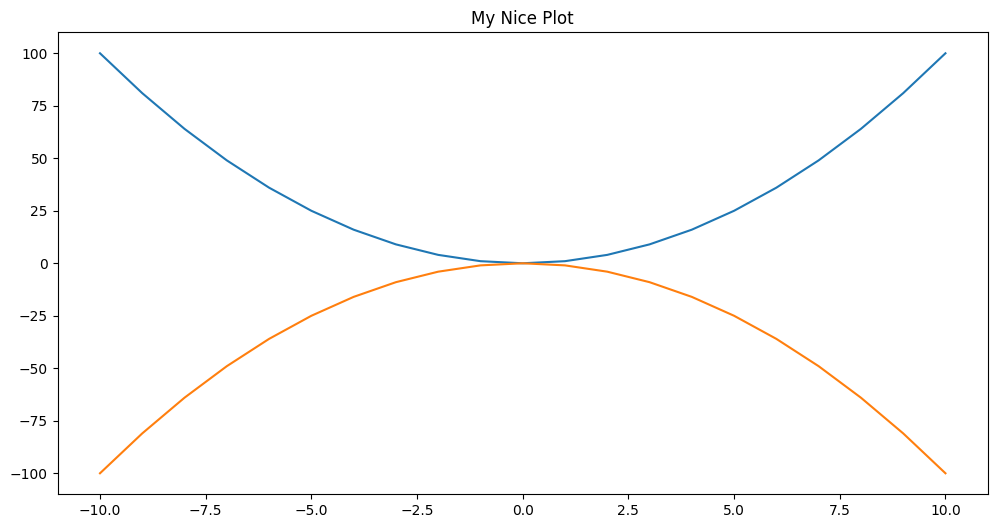

In [108]:
plt.figure(figsize=(12,6))
plt.title('My Nice Plot')
plt.plot(x,x ** 2)
plt.plot(x,-1*(x**2))

Text(0, 0.5, 'X Squared')

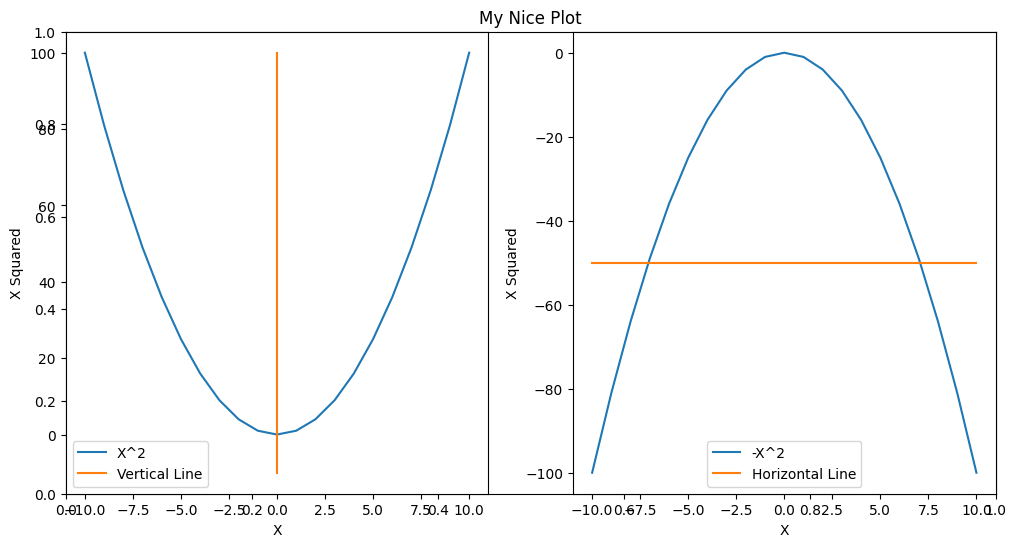

In [109]:
plt.figure(figsize=(12,6))
plt.title('My Nice Plot')

plt.subplot(1,2,1) #rows,columns,panel selected
plt.plot(x,x**2)
plt.plot([0,0,0],[-10,0,100])
plt.legend(['X^2','Vertical Line'])
plt.xlabel('X')
plt.ylabel('X Squared')

plt.subplot(1,2,2)
plt.plot(x,-1*(x**2))
#this below line effect does not specify which object oriented it refer to
plt.plot([-10,0,10],[-50,-50,-50])
plt.legend(['-X^2','Horizontal Line'])

plt.xlabel('X')
plt.ylabel('X Squared')


#### Object Oriented API, OOP Interface (Reccomend)

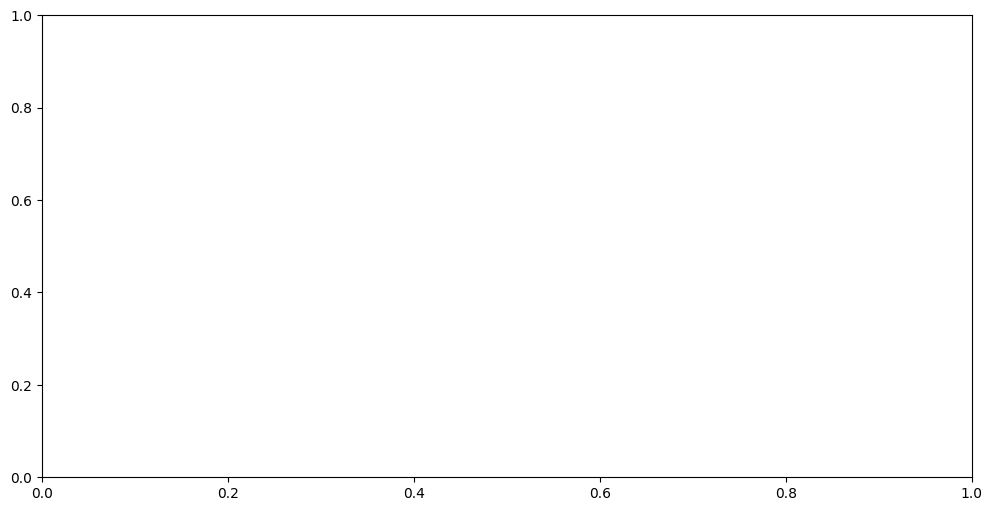

In [110]:
fig, axes = plt.subplots(figsize=(12,6))

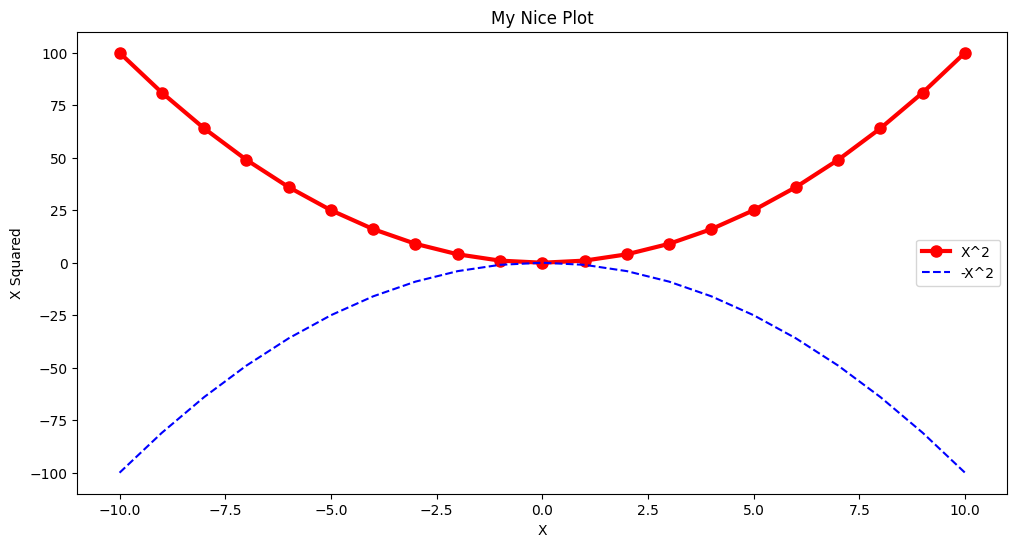

In [111]:
axes.plot(
    x, (x**2), color='red', linewidth=3,
    marker='o', markersize=8, label='X^2')

axes.plot(x,-1*(x**2),'b--',label='-X^2')

axes.set_xlabel('X')
axes.set_ylabel('X Squared')

axes.set_title('My Nice Plot')

axes.legend()

fig

Text(0.5, 1.0, 'My Nice Plot')

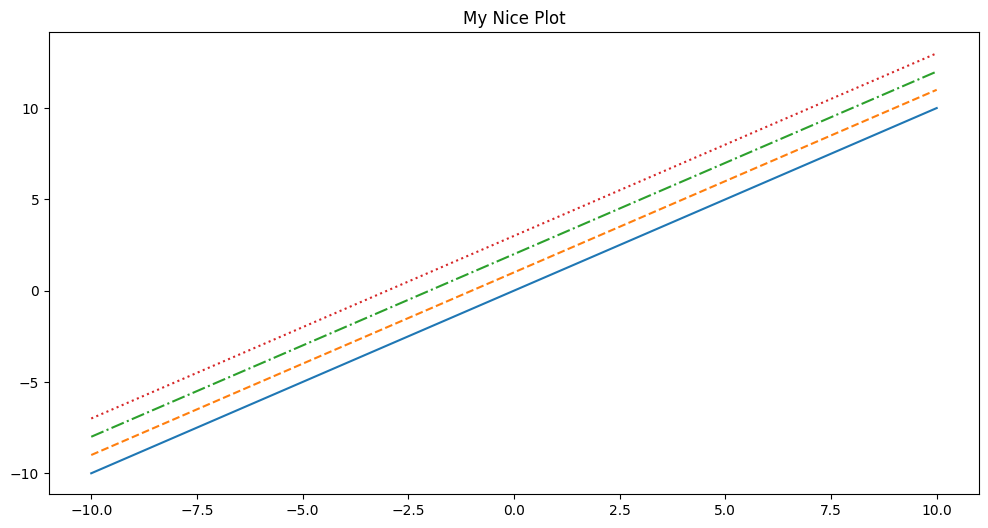

In [114]:
fig, axes = plt.subplots(figsize=(12,6))

axes.plot(x,x+0, linestyle='solid')
axes.plot(x,x+1, linestyle='dashed')
axes.plot(x,x+2, linestyle='dashdot')
axes.plot(x,x+3, linestyle='dotted')

axes.set_title('My Nice Plot')

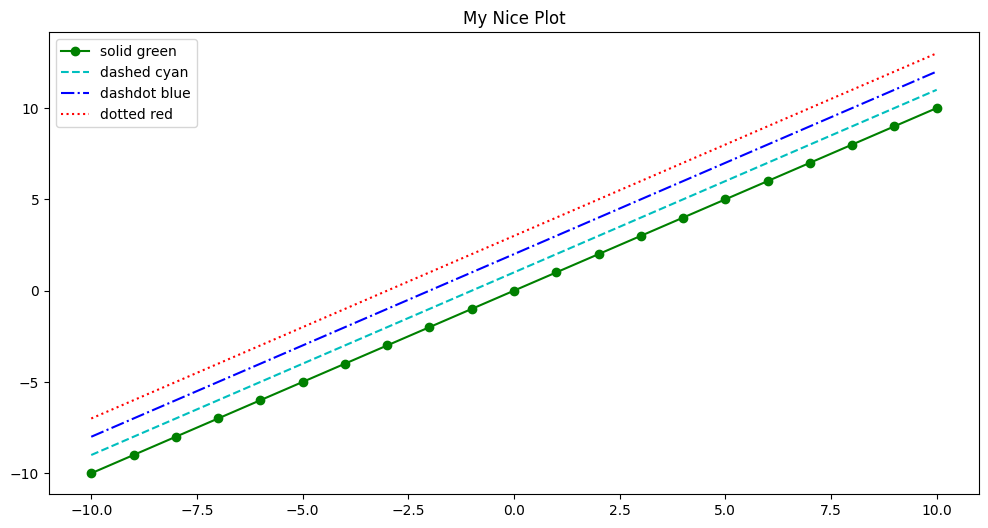

In [116]:
fig, axes = plt.subplots(figsize=(12,6))

axes.plot(x,x+0, '-og', label='solid green')
axes.plot(x,x+1, '--c', label='dashed cyan')
axes.plot(x,x+2, '-.b', label='dashdot blue')
axes.plot(x,x+3, ':r', label='dotted red')

axes.set_title('My Nice Plot')

axes.legend()

In [ ]:
print('Markers: {}'.format([m for m in plt.Line2D.markers]))

In [ ]:
linestyles = ['_','-','--',':']
print('Line styles: {}'.format(linestyles))

### Other types of plots
#### Figures and subfigures

In [ ]:
plot_objects = plt.subplots()
fig, ax = plot_objects
ax.plot([1,2,3],[1,2,3])
plot_objects

(<Figure size 1400x600 with 4 Axes>,
 array([[<Axes: >, <Axes: >],
        [<Axes: >, <Axes: >]], dtype=object))

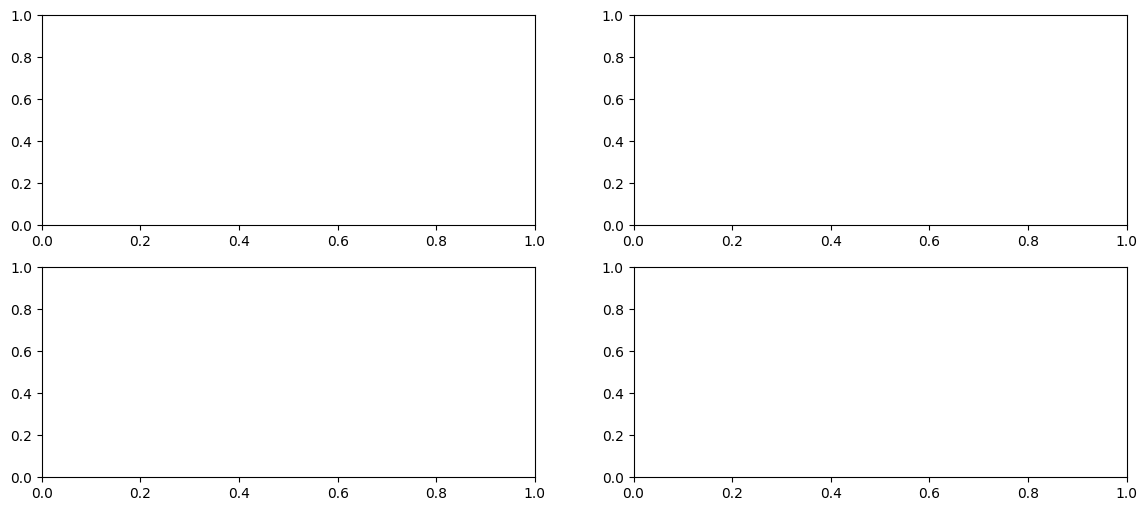

In [117]:
plot_objects = plt.subplots(nrows=2, ncols=2, figsize=(14,6))

fig, ((ax1, ax2),(ax3,ax4)) = plot_objects

plot_objects

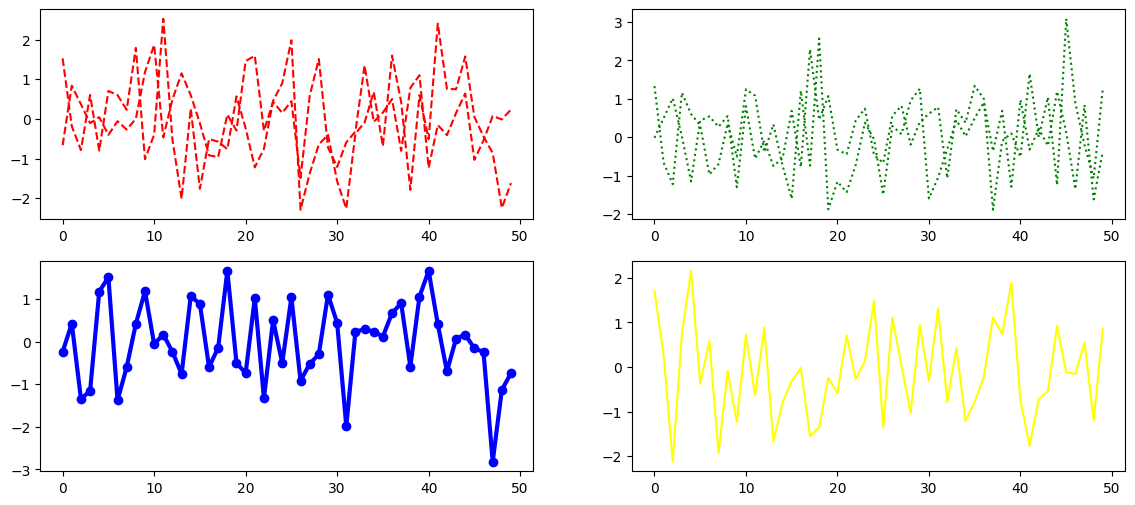

In [119]:
ax1.plot(np.random.randn(50), c='red', linestyle='--')
ax2.plot(np.random.randn(50), c='green', linestyle=':')
ax3.plot(np.random.randn(50), c='blue', marker='o', linewidth=3.0)
ax4.plot(np.random.randn(50), c='yellow')

fig

### The Subplot2grid command

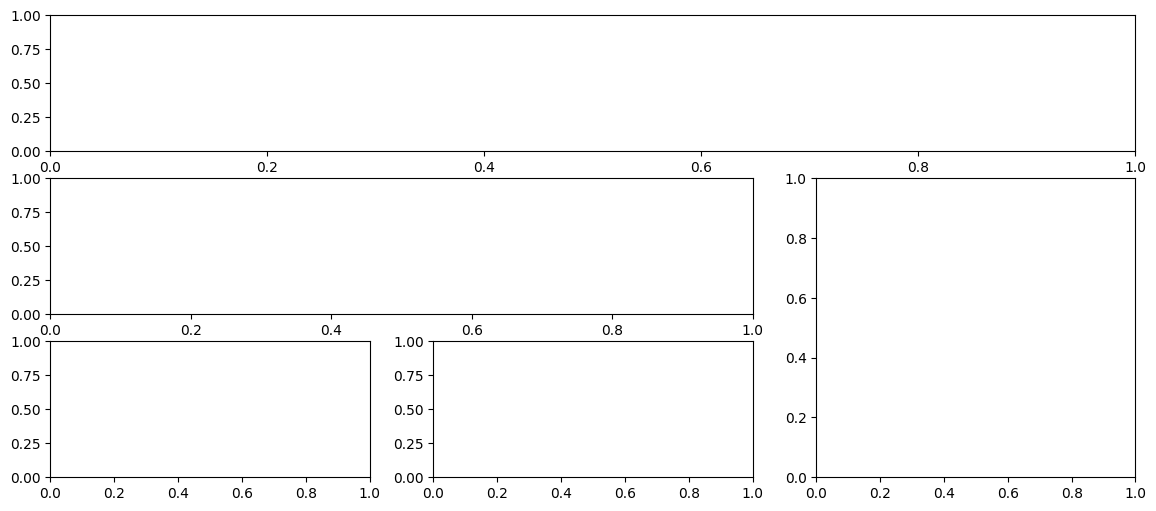

In [3]:
plt.figure(figsize=(14,6))

ax1 = plt.subplot2grid((3,3),(0,0), colspan=3)
ax2 = plt.subplot2grid((3,3),(1,0), colspan=2)
ax3 = plt.subplot2grid((3,3),(1,2), rowspan=2)
ax4 = plt.subplot2grid((3,3),(2,0))
ax5 = plt.subplot2grid((3,3),(2,1))

### Scatter Plot

In [4]:
N = 50
x = np.random.rand(N)
y = np.random.rand(N)
colors = np.random.rand(N)
area = np.pi * (20 * np.random.rand(N))**2 #0 to 15 point radi

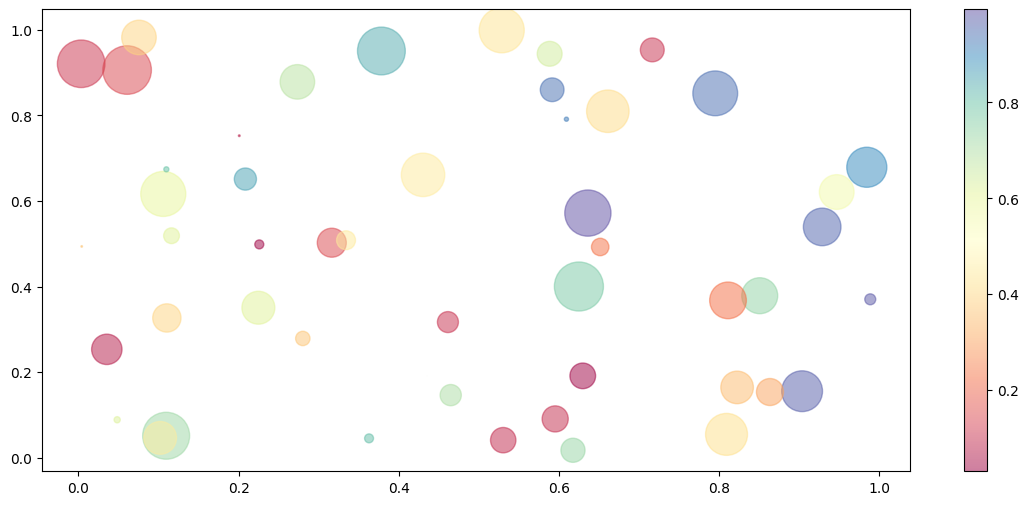

In [5]:
plt.figure(figsize=(14,6))

plt.scatter(x,y,s=area, c=colors, alpha=0.5, cmap='Spectral')
plt.colorbar()

plt.show()

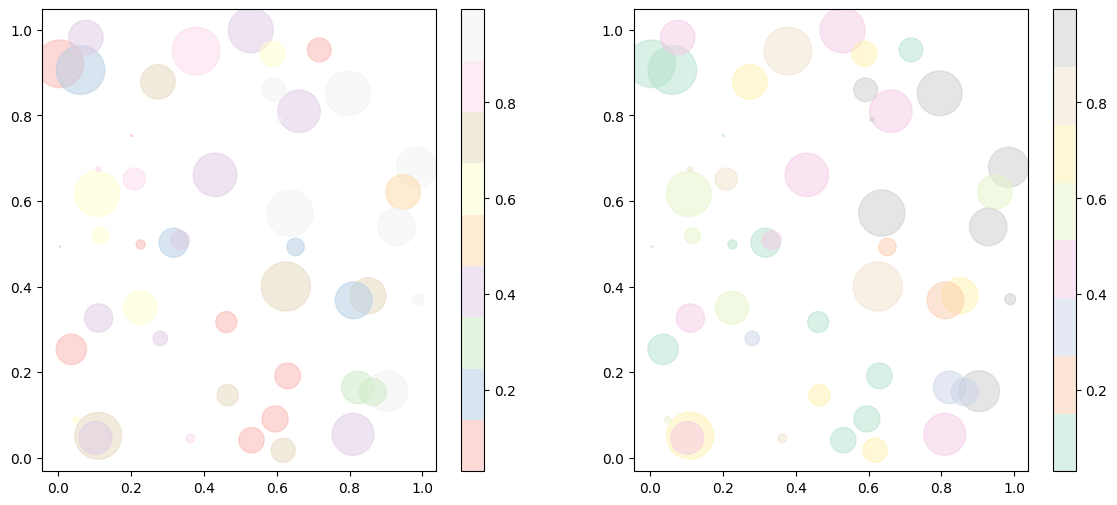

In [7]:
fig = plt.figure(figsize=(14,6))

axl = fig.add_subplot(1,2,1)
plt.scatter(x,y, s=area, c=colors, alpha=0.5, cmap='Pastel1')
plt.colorbar()

ax2 = fig.add_subplot(1,2,2)
plt.scatter(x,y, s=area, c=colors, alpha=0.5, cmap='Pastel2')
plt.colorbar()

plt.show()

### Histogram

In [8]:
values = np.random.rand(1000)

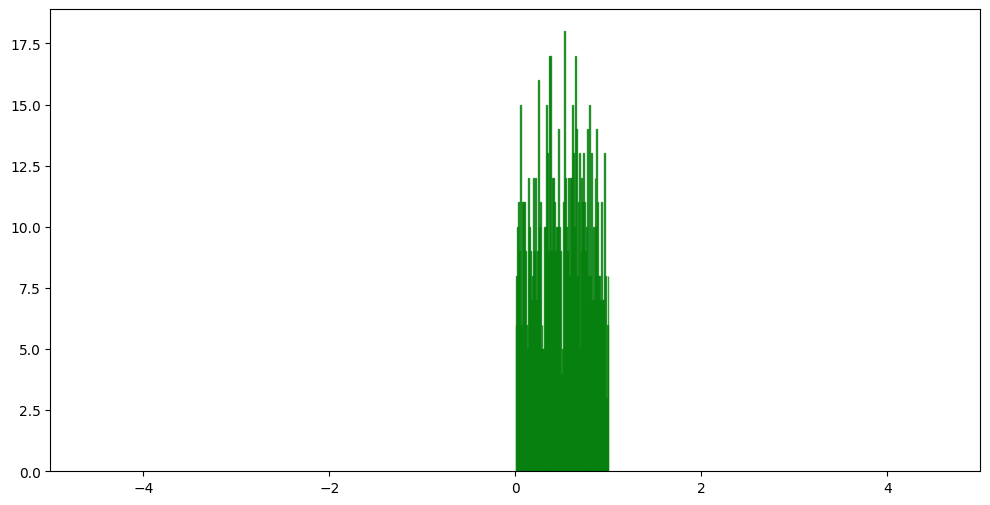

In [9]:
plt.subplots(figsize=(12,6))

plt.hist(values, bins=100, alpha=0.8,
         histtype='bar', color='steelblue',
         edgecolor='green')
plt.xlim(xmin=-5, xmax=5)

plt.show()

In [ ]:
fig.savefig('hist.png')

### KDE (kernel density estimation)

In [11]:
from scipy import stats

density = stats.kde.gaussian_kde(values)
density

C:\Users\Admin\AppData\Local\Temp\ipykernel_6620\1744215390.py:3: DeprecationWarning: Please import `gaussian_kde` from the `scipy.stats` namespace; the `scipy.stats.kde` namespace is deprecated and will be removed in SciPy 2.0.0.
  density = stats.kde.gaussian_kde(values)


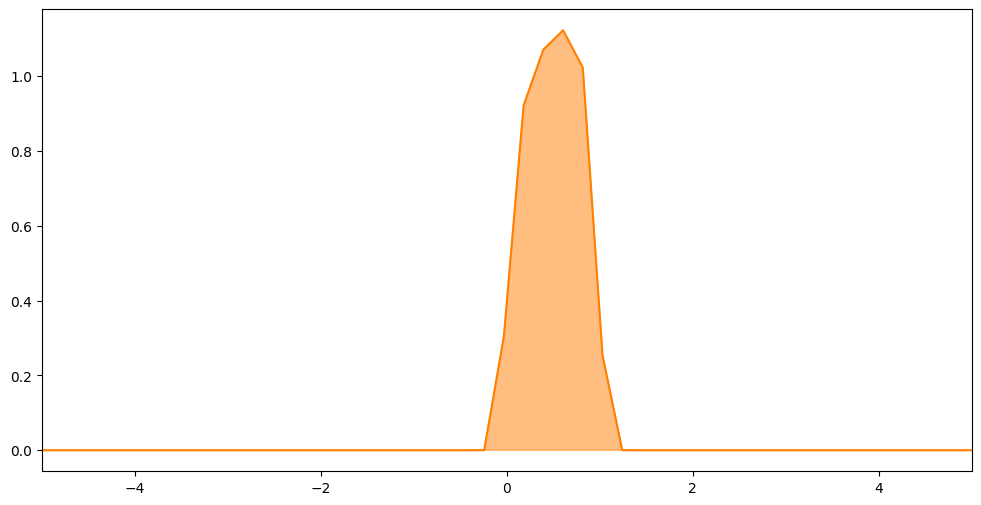

In [12]:
plt.subplots(figsize=(12,6))

values2 = np.linspace(min(values)-10, max(values)+10, 100)

plt.plot(values2, density(values2), color='#FF7F00')
plt.fill_between (values2, 0, density(values2), alpha=0.5, color='#FF7F00')
plt.xlim(xmin=-5, xmax=5)

plt.show()

### Combine plots

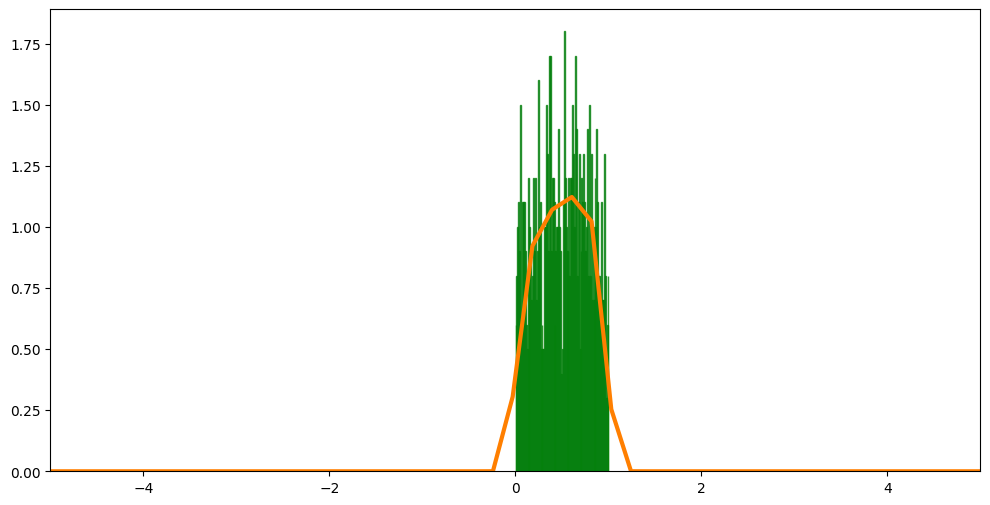

In [14]:
plt.subplots(figsize=(12,6))

plt.hist(values, bins=100, alpha=0.8, density=1,
         histtype='bar', color='steelblue',
         edgecolor='green')

plt.plot(values2, density(values2), color='#FF7F00', linewidth=3.0)
plt.xlim(xmin=-5, xmax=5)

plt.show()

#### Bar plots

In [16]:
Y = np.random.rand(1,5)[0]
Y2 = np.random.rand(1,5)[0]

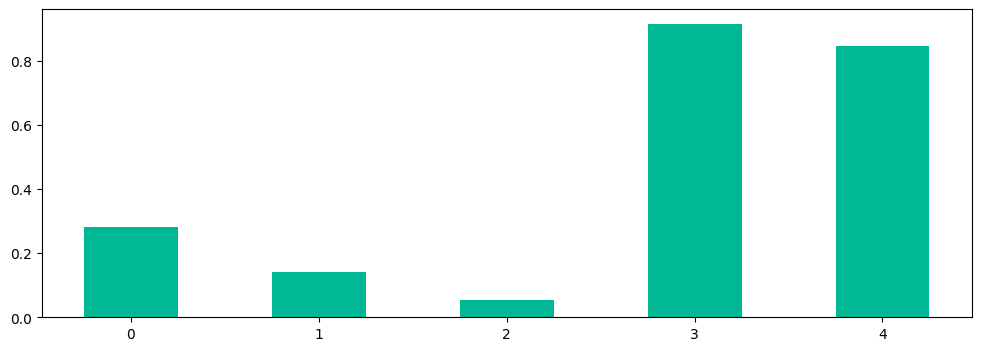

In [17]:
plt.figure(figsize=(12,4))

barWidth = 0.5
plt.bar(np.arange(len(Y)), Y, width=barWidth, color="#00b894")

plt.show()

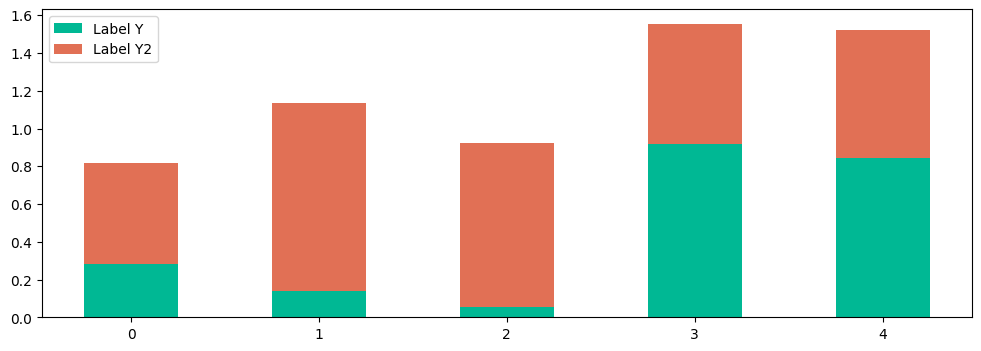

In [19]:
#stacked bars
plt.figure(figsize=(12,4))

barWidth = 0.5
plt.bar(np.arange(len(Y)), Y, width=barWidth, color='#00b894', label='Label Y')
plt.bar(np.arange(len(Y2)), Y2, width=barWidth, color='#e17055', bottom=Y, label='Label Y2')

#add legend to plot
plt.legend()
plt.show()


#### Boxplots and outlier detection

In [20]:
values = np.concatenate([np.random.rand(10), np.array([10, 15, -10, -15])])

(array([ 1.,  1.,  0.,  0.,  0., 10.,  0.,  0.,  1.,  1.]),
 array([-15., -12.,  -9.,  -6.,  -3.,   0.,   3.,   6.,   9.,  12.,  15.]),
 <BarContainer object of 10 artists>)

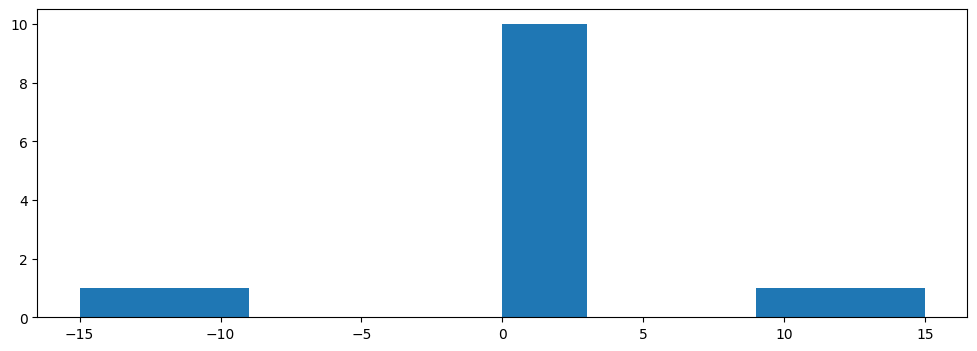

In [21]:
plt.figure(figsize=(12,4))
plt.hist(values)

{'whiskers': [<matplotlib.lines.Line2D at 0x1d25e1f4290>,
 'caps': [<matplotlib.lines.Line2D at 0x1d25e1f4250>,
 'boxes': [<matplotlib.lines.Line2D at 0x1d25e29cc90>],
 'medians': [<matplotlib.lines.Line2D at 0x1d25db76dd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1d25db76090>],
 'means': []}

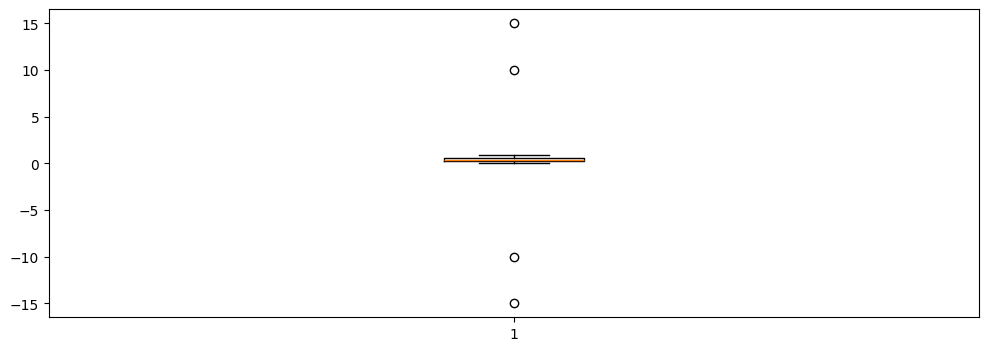

In [22]:
plt.figure(figsize=(12,4))
plt.boxplot(values)